<a href="https://www.kaggle.com/code/ishwor2048/titanic-dataset-eda-and-machine-learning-beginner?scriptVersionId=300374364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><b>Titanic Dataset Hands-on Data Overview, EDA and Classification Machine Learning</b></h1>

In this notebook, I have included most possible data overview, exploratory data analysis, data visualization, data pre-processing, machine learning life-cycle, and saving model locally. I hope you are going to learn a ton from this notebook. This notebook will be constantly updated, so please do not forget to check the most updated one next time!

<h1><b>Basic Imports

In [1]:
import numpy as np # importing numpy library for numerical calculations
import pandas as pd 

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries for data split, pre-processing and pipelines
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# sklearn: models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# sklearn: metrics
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, 
RocCurveDisplay, PrecisionRecallDisplay
)

# save model
import joblib

# Reproduceability
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# print the statement that imports are imported
print("Imports loaded!🤖")

Imports loaded!🤖


<h3><b>Load the data (Kaggle Built-in Titanic Dataset)

Before loading here, it is important that we load the data into the "INPUT" section to the right panel

In [2]:
train_path = "/kaggle/input/competitions/titanic/train.csv"
test_path = "/kaggle/input/competitions/titanic/test.csv"

Loading the training dataset from the path defined above, and naming it to "df"

In [3]:
# define the df
df = pd.read_csv(train_path)

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.") # check number of rows and columns in the dataset

There are 891 rows and 12 columns in the dataset.


In [5]:
# getting the top 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Getting top 3 rows of the dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# Getting last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Getting last 7 rows of the training dataset
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [9]:
# Getting sample 5 rows of the dataset. This function will pick the random 5 rows. Notice the index positions
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [10]:
# Checking information about the data in overall
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Getting quick statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
# Getting statistical summary of categorical columns
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [13]:
# Checking list of columns
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<h3><b>Quick EDA for Sanity Check

In [14]:
# Checking balance of the labels
round(df["Survived"].value_counts(normalize=True) * 100, 2)

Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

In [15]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Checking top missing values
df.isna().mean().sort_values(ascending=False).head(10)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
Sex            0.000000
Parch          0.000000
SibSp          0.000000
dtype: float64

In [17]:
# Quick correlation check for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

corr = round(df[num_cols].corr(numeric_only=True), 4)
display(corr)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


<h3><b>Data Visualization for additional data exploration

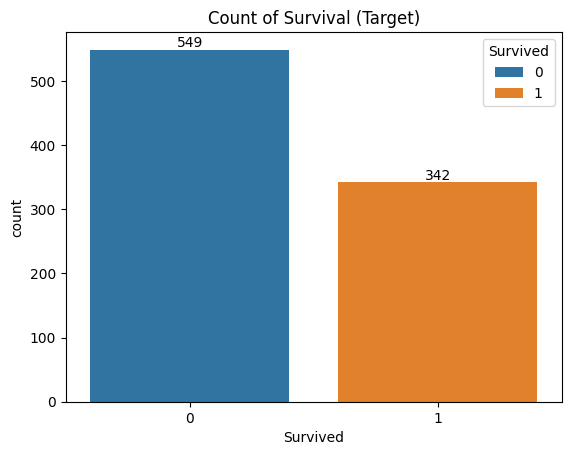

In [18]:
# Visualizing the survival vs non-survival
ax = sns.countplot(x='Survived', data=df, hue='Survived')
plt.title("Count of Survival (Target)")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

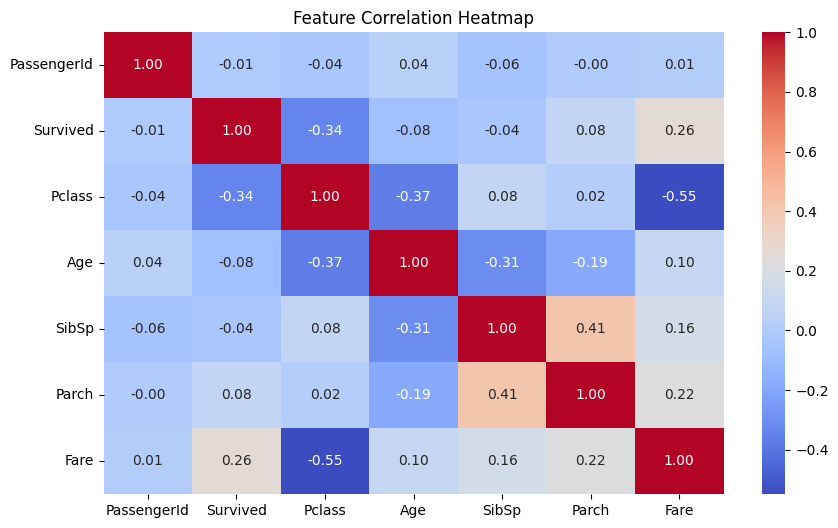

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# categorical pivot table: Survival based on gender
round(df[["Sex", "Survived"]].groupby(['Sex']).mean(), 3)

,Survived
Sex,
female,0.742
male,0.189


In [21]:
# categorical pivot table: Survival rate by Passenger class
round(df[["Pclass", "Survived"]].groupby(['Pclass']).mean(), 3)

,Survived
Pclass,
1,0.630
2,0.473
3,0.242


Text(0.5, 1.0, 'Age density Distribution by Survival')

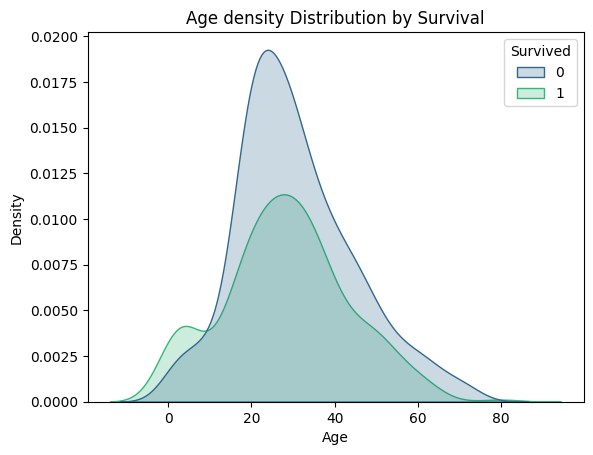

In [22]:
# Age distribution by survival (KDE PLOT)
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='viridis')
plt.title("Age density Distribution by Survival")

Text(0.5, 1.0, 'Relationship between Age, Fare and Survival')

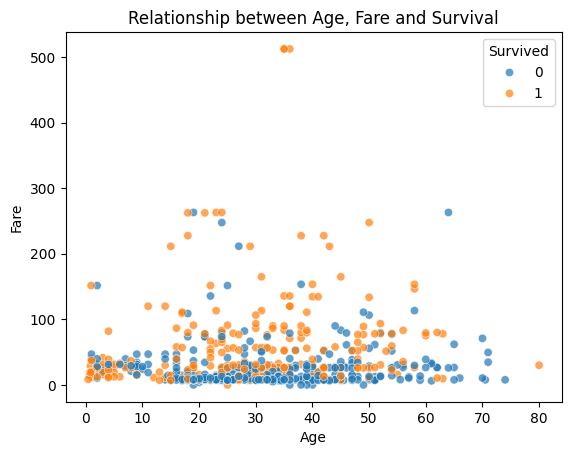

In [23]:
# fair vs age vs survival scatter plot
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title("Relationship between Age, Fare and Survival")

Text(0.5, 1.0, 'Survival Rate by Family Size')

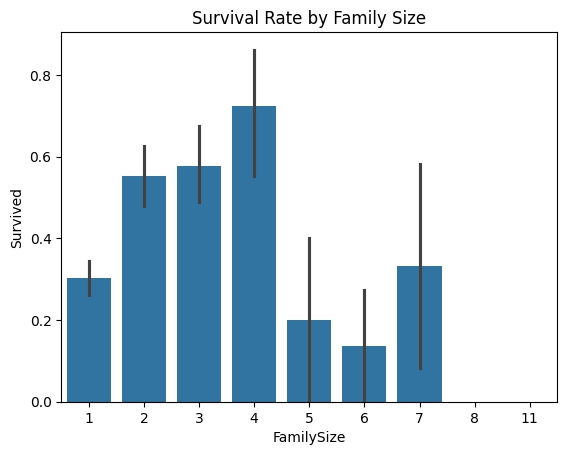

In [24]:
# survival rate by family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
sns.barplot(data=df, x = 'FamilySize', y = 'Survived')
plt.title("Survival Rate by Family Size")

Text(0.5, 1.0, 'Survival Probability: Sex vs Pclass')

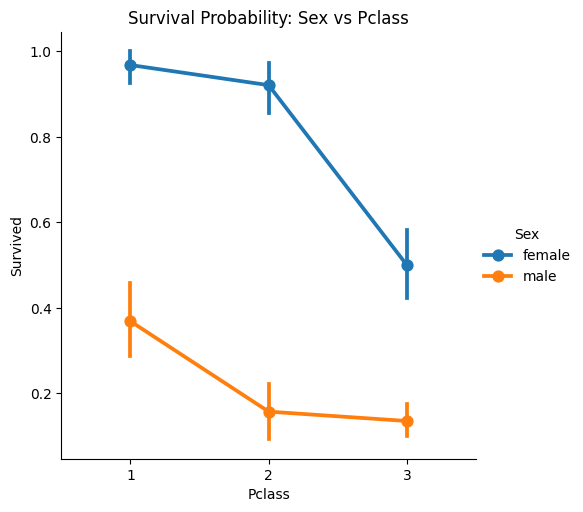

In [25]:
# Passenger class and sex interaction (catplot)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
plt.title("Survival Probability: Sex vs Pclass")

Text(0.5, 1.0, 'Surval by Port of Embarkation and Class')

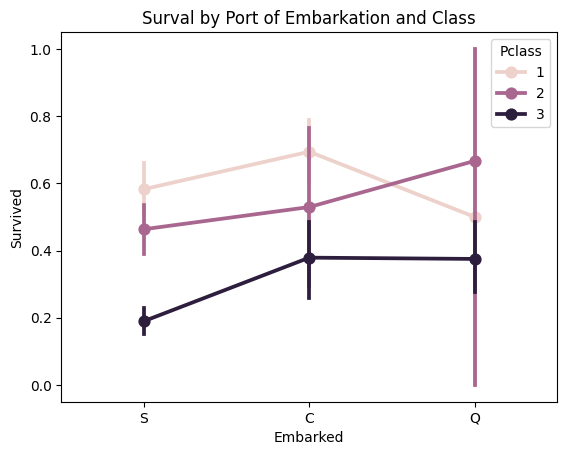

In [26]:
# Embarked port vs Survival vs. Pclass
sns.pointplot(data=df, x='Embarked', y='Survived', hue='Pclass')
plt.title("Surval by Port of Embarkation and Class")

Text(0.5, 1.0, 'Fair Distribution across classes')

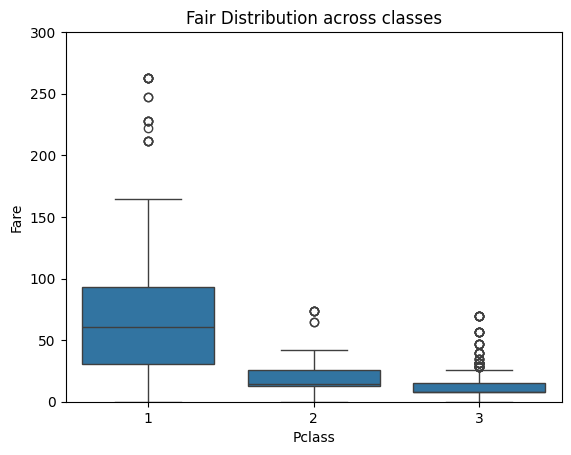

In [27]:
# Fair distribution by class
sns.boxplot(data=df, x = 'Pclass', y = 'Fare')
plt.ylim(0, 300) # Zoom in to ignore extreme outliers for better view
plt.title("Fair Distribution across classes")

Text(0.5, 1.0, 'Missing data Gap')

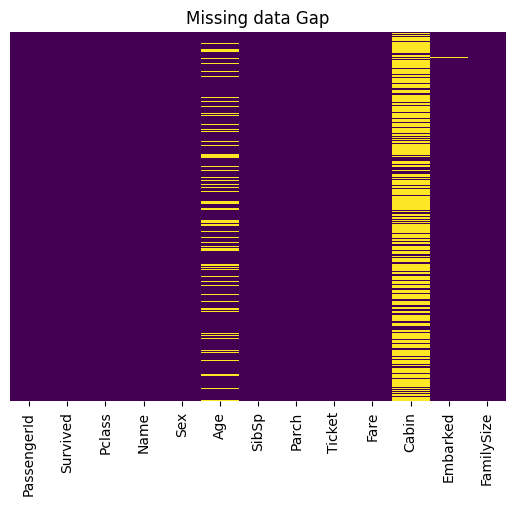

In [28]:
# missing value matrix
# Visualize the "emptiness" of the data 
# to see if Age or Cabin missigness is random or clustered
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing data Gap")

This combines a boxplot and KDE. It’s great for seeing if the age distribution of survivors in 1st class differs from 3rd class.

Text(0.5, 1.0, 'Age/Class Distribution by Surivival')

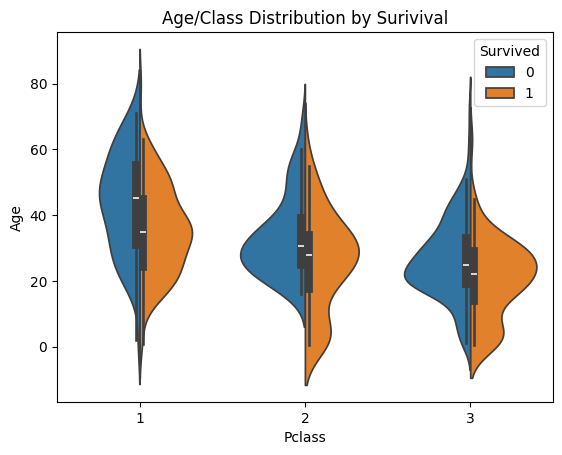

In [29]:
# Violin plot of Age by Passenger class and Survived
sns.violinplot(data=df, x="Pclass", y='Age', hue="Survived", split=True)
plt.title("Age/Class Distribution by Surivival")

You can extract titles (Mr, Mrs, Miss, Master, Dr) from the Name column. Visualizing survival by "Title" often reveals more than "Sex" alone (e.g., "Master" usually refers to young boys).

Text(0.5, 1.0, 'Survival Count by Title')

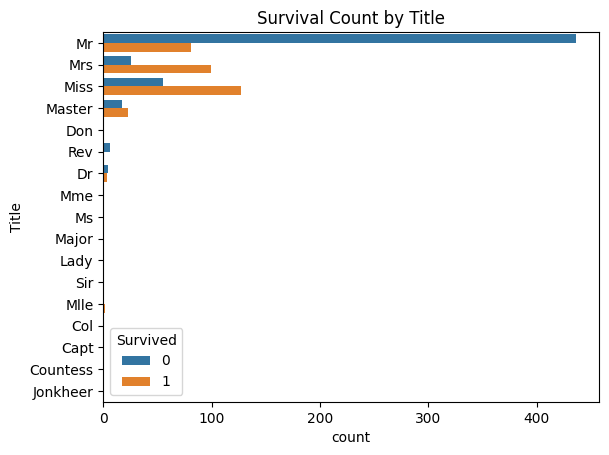

In [30]:
# Title extraction Analysis
# We can extract the title (Mr, Mrs, Miss, Master, Dr) from the Name column.
# Visualizing survival by "Title" often reveals more than "Sex" alone (e.g. Master usually refers to young boys)
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
sns.countplot(data=df, y='Title', hue="Survived")
plt.title("Survival Count by Title")

A bird's-eye view of all numerical relationships at once.

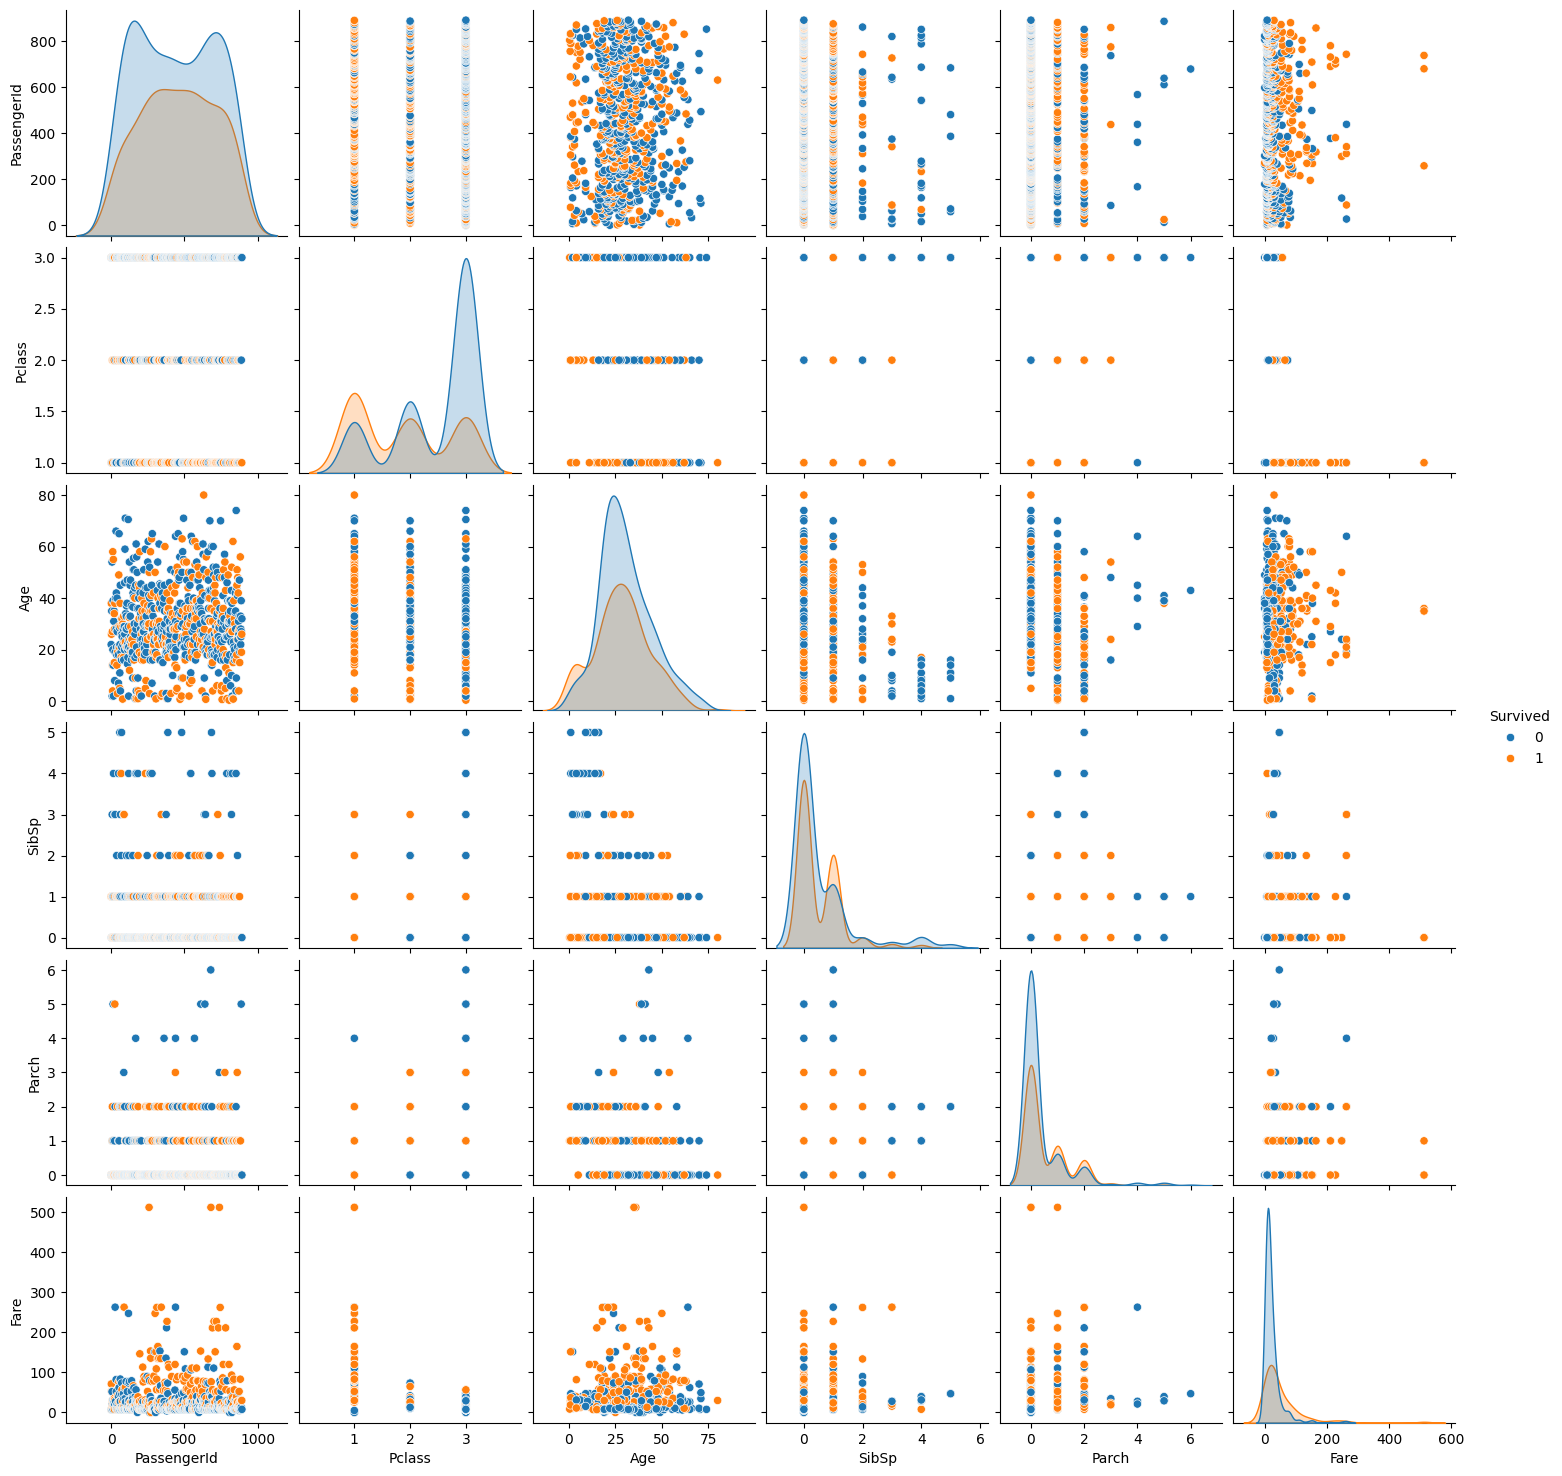

In [31]:
# Pairplot of numerical features
sns.pairplot(df[num_cols].dropna(), hue="Survived", diag_kind='kde')

Standard analysis looks at individuals. However, families on the Titanic often lived or died together. You can identify groups by looking for people with the same Surname and Ticket number.

Text(0.5, 1.0, 'Survival Consistency within Family Groups')

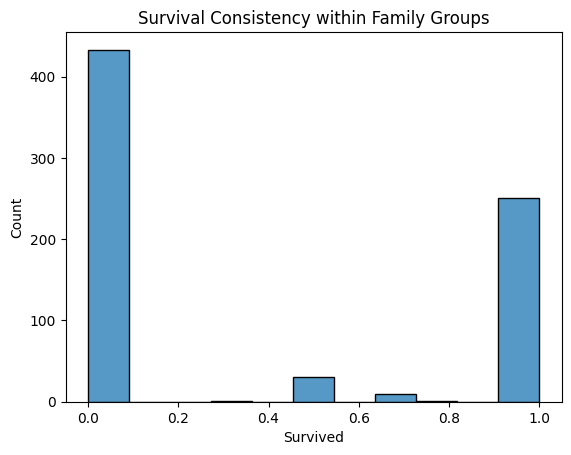

In [32]:
# Extract Surname
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0])

# Create a 'FamilyGroup' identifier
df['FamilyGroup'] = df['Surname'] + "_" + df['Ticket'].str[:-1]

# Find survival rates of these groups
group_survival = df.groupby('FamilyGroup')['Survived'].mean()
sns.histplot(group_survival)
plt.title("Survival Consistency within Family Groups")

The Cabin column is 77% null, so most people drop it. However, the Letter in the cabin (A, B, C, D, E, F, G, T) represents the Deck. Decks closer to the water line had lower survival rates.

Text(0.5, 1.0, 'Survival Rate by Ship Deck (Vertical Location)')

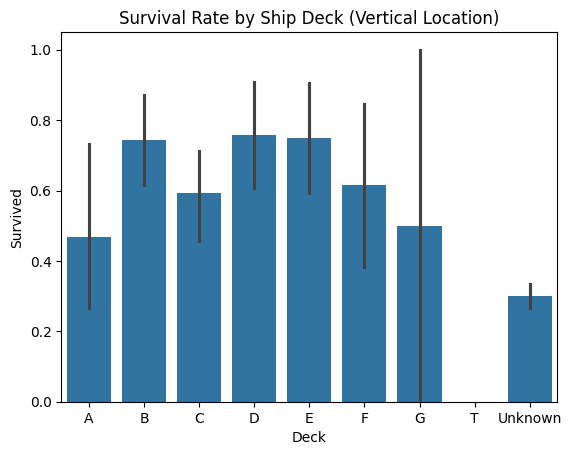

In [33]:
# Extract Deck from Cabin
df['Deck'] = df['Cabin'].str.slice(0,1)
df['Deck'] = df['Deck'].fillna('Unknown')

# Plot Deck vs Survival, ordered by vertical height of the ship
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
sns.barplot(data=df, x='Deck', y='Survived', order=deck_order)
plt.title("Survival Rate by Ship Deck (Vertical Location)")

Is there a "survival ceiling" for wealth? Instead of a scatter plot, use a cumulative distribution or a "Binned" bar plot to see if paying $100 vs $500 actually changed your odds.

Text(0.5, 1.0, 'Survival Probability by Fare Quintiles')

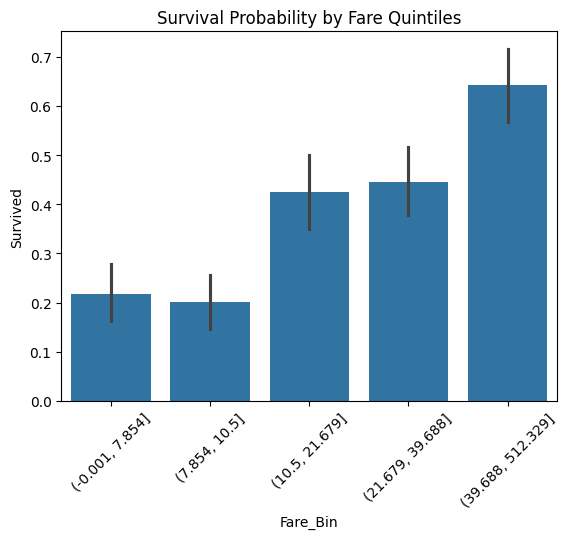

In [34]:
df["Fare_Bin"] = pd.qcut(df["Fare"], 5)

sns.barplot(data=df, x='Fare_Bin', y="Survived")
plt.xticks(rotation=45)
plt.title("Survival Probability by Fare Quintiles")

Some passengers traveled on the same ticket but weren't "Family" (e.g., nannies, friends, or cousins). The frequency of a ticket number tells you the total group size, which is often more accurate than SibSp + Parch.

Text(0.5, 1.0, 'Survival Rate by Group Size (based on Ticket Frequency)')

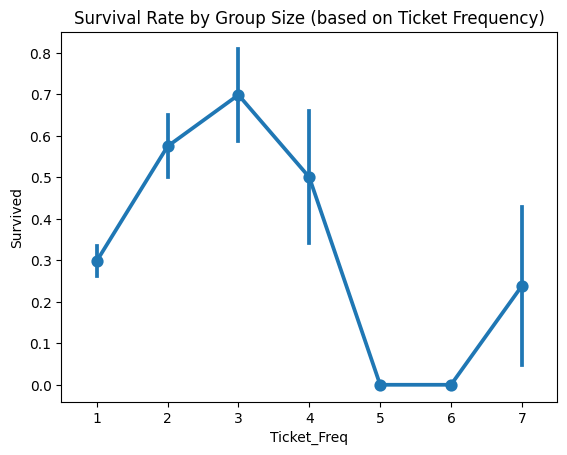

In [35]:
df["Ticket_Freq"] = df.groupby("Ticket")["Ticket"].transform('count')
sns.pointplot(data=df, x='Ticket_Freq', y='Survived')
plt.title("Survival Rate by Group Size (based on Ticket Frequency)")

Many people just fill missing Age with the median. To see if the missingness itself is a signal, check if people with "Missing Age" survived at different rates than those with "Known Age."

Text(0.5, 1.0, 'Survival Rate: Known Age vs. Missing Age')

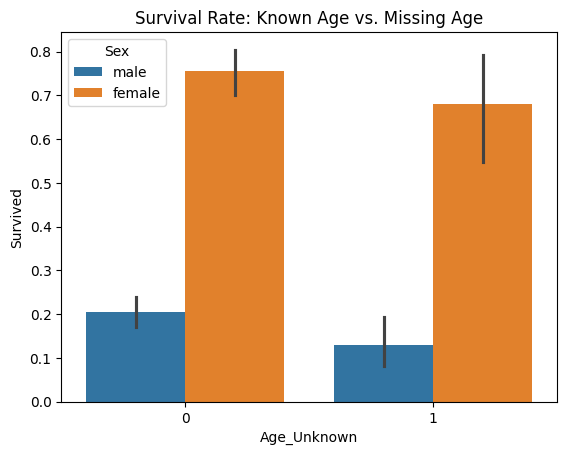

In [36]:
df["Age_Unknown"] = df["Age"].isnull().astype(int)
sns.barplot(data=df, x="Age_Unknown", y="Survived", hue="Sex")
plt.title("Survival Rate: Known Age vs. Missing Age")

To dive deeper into the relationship between categorical variables, we need to go beyond simple correlations (which only work well for numbers). We want to see if knowing one category (like Sex) gives us significant information about another (like Survival or Pclass).

**Chi-Square Test for Independence** is the gold standard for categorical association. It tells you if the relationship between two variables (e.g., Embarked and Survived) is statistically significant or just due to chance.

In [37]:
# Import necessary libraries and modules
from scipy.stats import chi2_contingency

def check_categorical_association(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Relationship between {col1} and {col2}:")
    print(f"   - Chi-square Statistics: {chi2:.4f}")
    print(f"   - P-value: {p:.4e}")
    return p

# checking if port of Embarkatioon is related to survival
check_categorical_association(df, "Embarked", "Survived")

Relationship between Embarked and Survived:
   - Chi-square Statistics: 26.4891
   - P-value: 1.7699e-06


np.float64(1.769922284120912e-06)

While Chi-Square tells you if there is a relationship, Cramer’s V tells you how strong it is (on a scale of 0 to 1). This is essentially the "correlation coefficient" for categories.

In [38]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example: How strong is the link between Pclass and Survival?
v_score = cramers_v(df['Pclass'], df['Survived'])
print(f"Cramer's V for Pclass & Survived: {v_score:.4f}")

Cramer's V for Pclass & Survived: 0.3367


**Mutual Information (MI) Scores** is a non-linear approach used often in feature selection. It measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.

In [39]:
from sklearn.feature_selection import mutual_info_classif

# We need to temporarily encode strings to numbers for MI
temp_df = df[['Pclass', 'Sex', 'Embarked', 'Survived']].copy()
temp_df['Sex'] = temp_df['Sex'].map({'male': 0, 'female': 1})
temp_df['Embarked'] = temp_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(-1)

X = temp_df.drop('Survived', axis=1)
y = temp_df['Survived']

mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_results = pd.Series(mi_scores, name="MI Scores", index=X.columns)
print(mi_results.sort_values(ascending=False))

Sex         0.150870
Pclass      0.058107
Embarked    0.016668
Name: MI Scores, dtype: float64


Sometimes a raw table is hard to read. Normalizing by index (row) shows you the likelihood of survival per category.

In [40]:
# What percentage of each Class survived?
pd.crosstab(df['Pclass'], df['Survived'], normalize='index')

# Does Sex affect the Survival Rate of different Embarked ports?
pd.crosstab(index=[df['Sex'], df['Embarked']], columns=df['Survived'], normalize='index')

Survived                0         1
Sex    Embarked                    
female C         0.123288  0.876712
       Q         0.250000  0.750000
       S         0.310345  0.689655
male   C         0.694737  0.305263
       Q         0.926829  0.073171
       S         0.825397  0.174603

<h3><b>Hands-on Feature Engineering

Creating copy of the dataset before proceeding

In [41]:
df_fe = df.copy()

In [42]:
# Quickly see the data
df_fe.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Surname,FamilyGroup,Deck,Fare_Bin,Ticket_Freq,Age_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,Braund,Braund_A/5 2117,Unknown,"(-0.001, 7.854]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,Cumings,Cumings_PC 1759,C,"(39.688, 512.329]",1,0


In [43]:
# Group rare titles into "Rare" for stability
rare_titles = df_fe["Title"].value_counts()
rare_titles = rare_titles[rare_titles < 10].index
df_fe["Title"] = df_fe["Title"].replace(rare_titles, "Rare")

In [44]:
df_fe["IsAlone"] = (df_fe["FamilySize"] == 1).astype(int)

In [45]:
# Deck from Cabin (first letter), missing -> "Unknown"
df_fe["Deck"] = df_fe["Cabin"].astype(str).str[0]
df_fe["Deck"] = df_fe["Deck"].replace("n", "Unknown")  # 'nan' -> 'n' after str conversion
df_fe["Deck"] = df_fe["Deck"].replace("N", "Unknown")

In [46]:
# Ticket group size (people sharing ticket sometimes correlate)
ticket_counts = df_fe["Ticket"].value_counts()
df_fe["TicketGroupSize"] = df_fe["Ticket"].map(ticket_counts)

In [47]:
# Fare per person (avoid divide-by-zero; FamilySize >= 1 always here)
df_fe["FarePerPerson"] = df_fe["Fare"] / df_fe["FamilySize"]

In [48]:
# Drop columns we won't use directly (IDs, high-cardinality, leakage-ish)
# Keep 'Name' dropped after extracting Title
drop_cols = ["PassengerId", "Name", "Cabin", "Ticket"]
df_fe = df_fe.drop(columns=drop_cols)

Let's check what we created

In [49]:
df_fe.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Surname,FamilyGroup,Deck,Fare_Bin,Ticket_Freq,Age_Unknown,IsAlone,TicketGroupSize,FarePerPerson
0,0,3,male,22.0,1,0,7.2500,S,2,Mr,Braund,Braund_A/5 2117,Unknown,"(-0.001, 7.854]",1,0,0,1,3.62500
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs,Cumings,Cumings_PC 1759,C,"(39.688, 512.329]",1,0,0,1,35.64165
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,Heikkinen,Heikkinen_STON/O2. 310128,Unknown,"(7.854, 10.5]",1,0,1,1,7.92500


<h3><b>Define Training Features (X) and Target Variable (y)

In [50]:
target_col = "Survived"

# if we drop the target column from all the features, it becomes training features
X = df_fe.drop(columns=[target_col])
# Now, as we have already defined target_col from the dataset, let's set that up
y = df_fe[target_col].astype(int)

In [51]:
# Identify column data types for pre-processing
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [52]:
print("Numerical Features:", numerical_features)

Numerical Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Ticket_Freq', 'Age_Unknown', 'IsAlone', 'TicketGroupSize', 'FarePerPerson']


In [53]:
print("Categorical Features:", categorical_features)

Categorical Features: ['Sex', 'Embarked', 'Title', 'Surname', 'FamilyGroup', 'Deck', 'Fare_Bin']


<h3><b>Train / Validation Split (Stratified for Classification

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                 random_state=RANDOM_STATE)

In [55]:
print("Train:", X_train.shape, "Val:", X_val.shape)
print("Train target rate:", y_train.mean(), "Val target rate:", y_val.mean())

Train: (712, 18) Val: (179, 18)
Train target rate: 0.38342696629213485 Val target rate: 0.3854748603351955


<h3><b>Building Data Preprocessing Pipeline</b></h3>
<li> Numeric: Impute missing values + scaling the feature values
<li> Categorical: Impute missing values + one hot encoding

In [57]:
# Numeric data transformer
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

# Categorical data transformer
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Now, applying categorical and numerical data transformer to the processing step
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numerical_features), 
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Data Preprocessing is Performed!✅")

Data Preprocessing is Performed!✅


<h3><b>Defining the function to evaluate any categorical machine learning model</b></h3>
This step will help us to define the function that will evaluate any classification model's performance so that we can quickly training more models and evaluate them without any issues.

In [68]:
def evaluate_classifier(model, X_tr, y_tr, X_te, y_te, model_name = "model"):
    """
    This function fits the pipeline model and prints classification metrics. 
    Also, returns a dictionary of metrics for comparison.
    """

    # Fitting training data to the model
    model.fit(X_tr, y_tr)

    # Perform predictions on the test data
    y_pred = model.predict(X_te)

    # Models like SVC output probability being True or some models can output probabilities
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]

    # ------------------------------------
    # Model evaluation metrices
    # ------------------------------------
    acc = accuracy_score(y_te, y_pred) # calculating accuracy from actual test labels against predicted test labels
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    # ROC AUC score calculation if probabilities exist
    auc = roc_auc_score(y_te, y_proba) if y_proba is not None else np.nan

    # printing out all the results as part of model evaluation techniques
    print(f"\n========== {model_name} ===========")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}" if not np.isnan(auc) else "ROC-AUC: (No Probabilities to calculate ROC AUC)")

    # generating confusion matrix to see the True Positive, True Negative, False Positive and False Negative
    print("\nConfusioin Matrix: ")
    print(confusion_matrix(y_te, y_pred))

    # Printing classification report for entire training evaluation report
    print("\nClassification Report: ")
    print(classification_report(y_te, y_pred, zero_division=0))

    metrics = {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1, "ROC-AUC": auc}
    return metrics
    

<h2><b>Training and Evaluating Few Baseline Models</b></h2>
It is now finally time train a few baseline models and evaluate and see how they are doing. Later steps, we will tune those models

In [69]:
# Beginning with very basic but powerful decision tree model
dt_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [70]:
# let's jump now to the RandomForest
rf_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", RandomForestClassifier(
        random_state=RANDOM_STATE, 
        n_estimators=300
    ))
])

In [71]:
# K-Nearest Neighbors (KNN) -> This model needs scaling which is already done above in numeric pipeline
knn_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", KNeighborsClassifier())
])

In [72]:
# Support Vector Classifier (Support ROC-AUC, enabling probability=True)
svc_clf = Pipeline(steps=[
    ("preprocess", preprocessor), 
    ("model", SVC(probability=True, random_state = RANDOM_STATE))
])

In [73]:
# Initializing empty list to store the results of model performances
results = []

In [74]:
# Appending all the results from different models to empty list "results" that we initialized above
results.append(evaluate_classifier(dt_clf, X_train, y_train, X_val, y_val, model_name="DecisionTree (Baseline)"))
results.append(evaluate_classifier(rf_clf, X_train, y_train, X_val, y_val, model_name="RandomForest (Baseline)"))
results.append(evaluate_classifier(knn_clf, X_train, y_train, X_val, y_val, model_name="KNN (Baseline)"))
results.append(evaluate_classifier(svc_clf, X_train, y_train, X_val, y_val, model_name="SVC (Baseline"))


========== DecisionTree (Baseline) ===========
Accuracy: 0.8212
Precision: 0.7761
Recall: 0.7536
F1-score : 0.7647
ROC AUC: 0.8086

Confusioin Matrix: 
[[95 15]
 [17 52]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


========== RandomForest (Baseline) ===========
Accuracy: 0.8045
Precision: 0.7931
Recall: 0.6667
F1-score : 0.7244
ROC AUC: 0.8478

Confusioin Matrix: 
[[98 12]
 [23 46]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighte

In [75]:
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

In [76]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,SVC (Baseline,0.832402,0.800000,0.753623,0.776119,0.867325
0,DecisionTree (Baseline),0.821229,0.776119,0.753623,0.764706,0.808630
1,RandomForest (Baseline),0.804469,0.793103,0.666667,0.724409,0.847760
2,KNN (Baseline),0.770950,0.725806,0.652174,0.687023,0.802042


<h2><b>Hyperparameter Tuning</b></h2>
Looks like models did learn faily well, however, I think we can do even better from model's performance standpoint. 
So we will perform hyperparameter tuning individually on each of the the models and see how they are performing. 

In [77]:
# Please check back for the next step on hands-on hyperparameter tuning. In a couple of days, I will make updates further with detailed
# hyperparameter tuning on each of those models. 

# Until then, please follow and subscribe: Data speaks YouTube channel:

https://www.youtube.com/@DataSpeaks4u